# Challenge 5

Topic: Classification<br>
Date: xx/xx/2016 <br>
Name: Travis James <br>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve

%matplotlib inline

/Users/travisjames/anaconda3/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


**Challenge 5.1**

In [123]:
df_vote = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [124]:
df_vote.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [125]:
for index in range(1, 17):
    df_vote[index] = df_vote[index].map(lambda x: 1 if x == 'y' else 0 if x == 'n' else np.nan)

In [126]:
df_vote.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [127]:
df_vote = df_vote.fillna(df_vote.mean())

**Challenge 5.2**

In [7]:
y = df_vote[0]
X = df_vote.iloc[:,1:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

**Challenge 5.3**

In [9]:
accuracy_scores = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

In [10]:
accuracy_scores

[0.9007633587786259,
 0.89312977099236646,
 0.9007633587786259,
 0.9007633587786259,
 0.91603053435114501,
 0.93129770992366412,
 0.91603053435114501,
 0.92366412213740456,
 0.93129770992366412,
 0.93129770992366412,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.91603053435114501,
 0.91603053435114501,
 0.91603053435114501]

9 and 10 neighbors gave the maximum accuracy score of 0.9313

**Challenge 5.4**

In [11]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred = logit.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.93893129771


**Challenge 5.5**

In [12]:
y.head()

0    republican
1    republican
2      democrat
3      democrat
4      democrat
Name: 0, dtype: object

In [13]:
democrats = 0
republicans = 0
for house_member in y:
    if house_member == 'republican':
        republicans += 1
    else:
        democrats += 1

In [14]:
party_counts = (democrats, republicans)
parties = ('Democrats', 'Republicans')
y_pos = np.arange(len(parties))

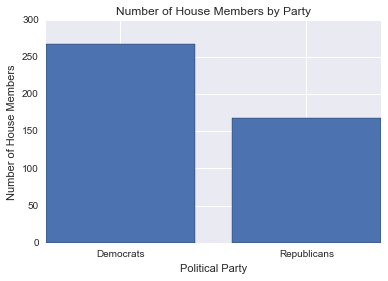

In [15]:
plt.bar(y_pos, party_counts, align = 'center')
plt.xticks(y_pos, parties)
plt.xlabel('Political Party')
plt.ylabel('Number of House Members')
plt.title('Number of House Members by Party');

There are 267 democrats and 168 republicans

In [16]:
def generate_democrats(X):
    democrat_all = ['democrat' for x in range(0, len(X.index))]
    return democrat_all

def generate_republicans(X):
    republican_all = ['republican' for x in range(0, len(X.index))]
    return republican_all

In [17]:
y_pred_democrat = generate_democrats(X_test)
print(accuracy_score(y_test, y_pred_democrat))

0.587786259542


In [18]:
y_pred_republican = generate_republicans(X_test)
print(accuracy_score(y_test, y_pred_republican))

0.412213740458


**Challenge 5.6**

In [19]:
logit_acc = accuracy_score(y_test, y_pred)
democrat_acc = accuracy_score(y_test, y_pred_democrat)
republican_acc = accuracy_score(y_test, y_pred_republican)

In [20]:
logit_accs = [logit_acc]*20
democrat_accs = [democrat_acc]*20
republican_accs = [republican_acc]*20
neighbors = list(range(1, 21))

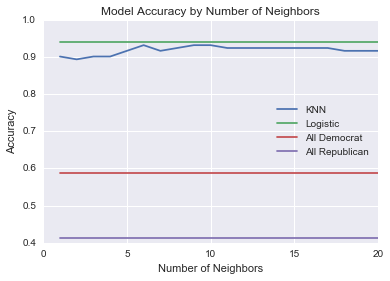

In [21]:
plt.plot(neighbors, accuracy_scores)
plt.plot(neighbors, logit_accs)
plt.plot(neighbors, democrat_accs)
plt.plot(neighbors, republican_accs)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.title('Model Accuracy by Number of Neighbors')
plt.legend(['KNN', 'Logistic', 'All Democrat', 'All Republican'], loc = 'center right');

**Challenge 5.7**

In [47]:
m, train_acc, test_acc = learning_curve(LogisticRegression(), X, y, cv=5)

In [48]:
train_cv_acc = np.mean(train_acc, axis=1)
test_cv_acc = np.mean(test_acc, axis=1)

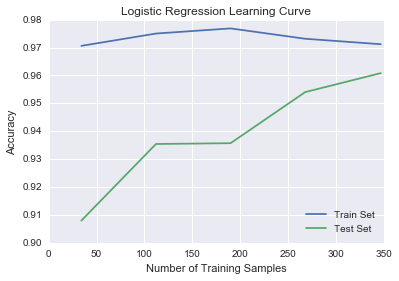

In [58]:
plt.plot(m, train_cv_acc)
plt.plot(m, test_cv_acc)
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(['Train Set', 'Test Set'], loc = 'lower right');

In [53]:
m_knn, tr_acc_knn, ts_acc_knn = learning_curve(KNeighborsClassifier(n_neighbors = 9), X, y, cv=5)

In [54]:
ts_cv_acc_knn = np.mean(tr_acc_knn, axis=1)
tr_cv_acc_knn = np.mean(ts_acc_knn, axis=1)

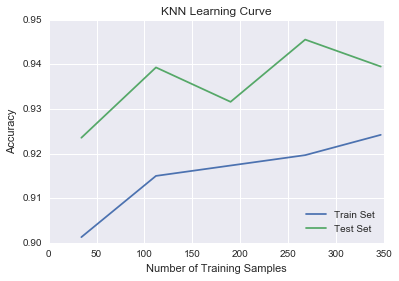

In [59]:
plt.plot(m_knn, tr_cv_acc_knn)
plt.plot(m_knn, ts_cv_acc_knn)
plt.title('KNN Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(['Train Set', 'Test Set'], loc = 'lower right');

**Challenge 5.8**

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))

0.93893129771


In [76]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(accuracy_score(y_test, y_pred_svc))

0.954198473282


In [77]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred_dtc))

0.946564885496


In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.961832061069


**Challenge 5.9**

In [80]:
from sklearn.cross_validation import cross_val_score

In [104]:
cv_acc_logit = cross_val_score(LogisticRegression(), X, y, cv=5)
cv_acc_logit = np.mean(cv_acc_logit)
cv_acc_logit

0.9584839979587374

In [95]:
cv_acc_knn = cross_val_score(KNeighborsClassifier(n_neighbors = 9), X, y, cv=5)
cv_acc_knn = np.mean(cv_acc_knn)
cv_acc_knn

0.92418227989599289

In [105]:
cv_acc_gnb = cross_val_score(GaussianNB(), X, y, cv=5)
cv_acc_gnb = np.mean(cv_acc_gnb)
cv_acc_gnb

0.94014422492770533

In [106]:
cv_acc_svc = cross_val_score(SVC(), X, y, cv=5)
cv_acc_svc = np.mean(cv_acc_svc)
cv_acc_svc

0.95396527423391897

In [107]:
cv_acc_dtc = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
cv_acc_dtc = np.mean(cv_acc_dtc)
cv_acc_dtc

0.94236349055916013

In [108]:
cv_acc_rf = cross_val_score(RandomForestClassifier(), X, y, cv=5)
cv_acc_rf = np.mean(cv_acc_rf)
cv_acc_rf

0.93995893173920442

**Challenge 5.10**

In [147]:
df_vote = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [148]:
for index in range(1, 17):
    df_vote[index] = df_vote[index].map(lambda x: 1 if x == 'y' else 0 if x == 'n' else np.nan)

In [149]:
df_vote = df_vote.fillna(df_vote.mode().iloc[0])

In [150]:
df_vote.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [161]:
y = df_vote.iloc[:,1]
X = df_vote.iloc[:,2:]

In [165]:
cv_acc_logit = cross_val_score(LogisticRegression(), X, y, cv=5)
cv_acc_logit = np.mean(cv_acc_logit)
cv_acc_logit

0.66652511482102494

**Challenge 5.11**

In [170]:
import pickle

In [185]:
with open("movie_df.pkl", 'rb') as picklefile: 
    movie_df = pickle.load(picklefile)

In [186]:
movie_df.head()

,index,Budget,Genre1,Genre2,Gross_Revenue,IMDB_Reviews,IMDB_Score,Metascore,Month,Opening_Week_Revenue,Oscar_Wins,Rating,Run_Time,Title,Year,CPI Adjustment
0,0,207015000.0,Action,Crime,5.967807e+08,1698798,9.0,82.0,July,1.772624e+08,2,PG-13,152,The Dark Knight,2008,1.119
1,1,122200000.0,Action,Adventure,4.901250e+08,1230627,8.9,94.0,December,2.519149e+07,11,PG-13,201,The Lord of the Rings: The Return of the King,2003,1.300
2,2,176800000.0,Action,Adventure,3.232886e+08,1489333,8.8,74.0,July,8.428421e+06,4,PG-13,148,Inception,2010,1.105
3,3,52200000.0,Action,Adventure,8.414604e+08,849150,8.8,80.0,June,1.025320e+06,1,PG,124,Star Wars: Episode V - The Empire Strikes Back,1980,2.900
4,4,130200000.0,Action,Adventure,4.393726e+08,1253381,8.8,92.0,December,1.997083e+07,4,PG-13,178,The Lord of the Rings: The Fellowship of the Ring,2001,1.400


In [187]:
movie_df = movie_df.drop(['index', 'CPI Adjustment'], axis=1)

In [205]:
y = movie_df['Rating']
X = movie_df.drop(['Rating', 'Title'], axis=1)

In [208]:
X = pd.get_dummies(X)

In [196]:
y.unique()

array(['PG-13', 'PG', 'R', 'UNRATED', 'G', 'PASSED', 'NOT RATED',
       'APPROVED', 'NC-17'], dtype=object)

In [197]:
pg_13 = 0
pg = 0
r = 0
unrated = 0
g = 0
passed = 0
not_rated = 0
approved = 0
nc_17 = 0

for rating in y:
    if rating == 'PG-13':
        pg_13 += 1
    elif rating == 'PG':
        pg += 1
    elif rating == 'R':
        r += 1
    elif rating == 'UNRATED':
        unrated += 1
    elif rating == 'G':
        g += 1
    elif rating == 'PASSED':
        passed += 1
    elif rating == 'NOT RATED':
        not_rated += 1
    elif rating == 'APPROVED':
        approved += 1
    else:
        nc_17 +=1

In [198]:
rating_counts = (g, pg, pg_13, r, nc_17, passed, unrated, not_rated, approved)
ratings = ('G', 'PG', 'PG-13', 'R', 'NC-17', 'PASSED', 'UNRATED', 'NOT RATED', 'APPROVED')
y_pos = np.arange(len(ratings))

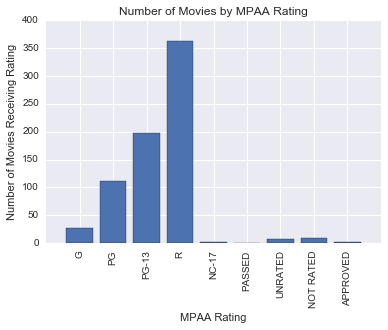

In [202]:
plt.bar(y_pos, rating_counts, align = 'center')
plt.xticks(y_pos, ratings, rotation = 'vertical')
plt.xlabel('MPAA Rating')
plt.ylabel('Number of Movies Receiving Rating')
plt.title('Number of Movies by MPAA Rating');

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [210]:
logit_movie = LogisticRegression().fit(X_train, y_train)
y_pred_logit = logit_movie.predict(X_test)
print(accuracy_score(y_test, y_pred_logit))

0.601851851852


In [212]:
accuracy_scores = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

In [213]:
accuracy_scores

[0.45370370370370372,
 0.35648148148148145,
 0.46759259259259262,
 0.46296296296296297,
 0.45833333333333331,
 0.5,
 0.49074074074074076,
 0.50462962962962965,
 0.52314814814814814,
 0.56018518518518523,
 0.52314814814814814,
 0.56018518518518523,
 0.55092592592592593,
 0.54629629629629628,
 0.55555555555555558,
 0.54629629629629628,
 0.55092592592592593,
 0.55092592592592593,
 0.54166666666666663,
 0.56018518518518523]

In [214]:
knn_movie = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
y_pred_knn = knn_movie.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))

0.523148148148


In [215]:
common_rating = y.mode().iloc[0]

In [221]:
y_dumb = [common_rating]*len(y_test)

In [222]:
print(accuracy_score(y_test, y_dumb))

0.5


KNN does slightly better than the baseline predictor, by about 2.3%. The logistic regression performs significantly better, however, with a score improvement of over 10%.

In [224]:
logit_movie.coef_

array([[ -1.02289031e-07,   3.52919976e-08,  -1.05245530e-04,
         -1.82258341e-08,  -1.00572711e-07,  -8.06586355e-07,
         -7.36022812e-10,  -3.65864915e-07,  -2.73199755e-10,
         -2.29401357e-11,  -8.76797301e-11,  -1.31527377e-09,
          3.12619179e-09,  -3.58354245e-09,  -5.21844592e-10,
          0.00000000e+00,  -1.21829868e-10,  -2.50155280e-17,
         -3.32052992e-16,  -3.38608365e-18,  -2.86762002e-18,
         -6.07430383e-11,  -1.50205542e-11,  -9.67251557e-10,
         -4.62967715e-10,  -3.60583593e-09,  -1.43636118e-09,
         -1.03738382e-10,  -2.38428921e-15,  -2.13543523e-10,
         -3.34312967e-12,   4.86352656e-09,  -7.36170841e-11,
         -3.05664734e-12,  -1.98111521e-14,  -6.30740557e-17,
         -5.30523379e-10,  -1.87621042e-10,  -5.45203796e-19,
         -5.98401692e-10,  -2.57129128e-09,   4.25475993e-10,
         -1.10651644e-09,  -3.58772221e-10,   4.59240987e-09,
         -4.41270137e-10,  -6.72033424e-10,  -1.25185595e-10,
        

**Challenge 5.12**

In [263]:
bcs_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [264]:
bcs_df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [265]:
bcs_df[0].mean()

52.45751633986928

In [233]:
bcs_df[0].std()

10.80345234930328

In [248]:
bcs_df[bcs_df[3] == 1][0].mean()

52.01777777777778

In [249]:
bcs_df[bcs_df[3] == 1][0].std()

11.012154179929546

In [250]:
bcs_df[bcs_df[3] == 2][0].mean()

53.67901234567901

In [251]:
bcs_df[bcs_df[3] == 2][0].std()

10.16713720829741

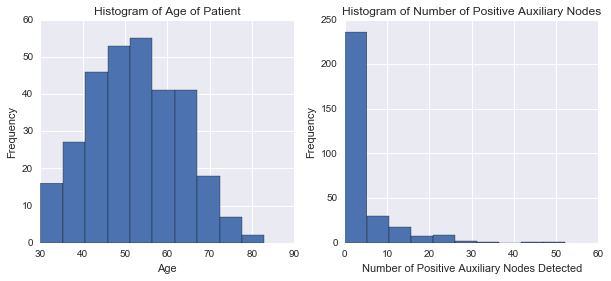

In [253]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(bcs_df[0])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age of Patient')

plt.subplot(1, 2, 2)
plt.hist(bcs_df[2])
plt.xlabel('Number of Positive Auxiliary Nodes Detected')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Positive Auxiliary Nodes');

In [255]:
bcs_df[1].min()

58

In [256]:
bcs_df[1].max()

69

The earliest year of surgery is 1958. The most recent year is 1969.

In [268]:
X_train, X_test, y_train, y_test = train_test_split(bcs_df.iloc[:,:3], bcs_df.iloc[:,3], test_size=0.3)

In [269]:
logit_survival = LogisticRegression().fit(X_train, y_train)
y_pred_survival = logit_survival.predict(X_test)
print(accuracy_score(y_test, y_pred_survival))

0.673913043478


The model performs alright, predicting 67.38% of survival statuses correctly. In the medical field, however, this result may not be sufficient.

In [270]:
logit_survival.coef_

array([[ 0.01619891, -0.03809211,  0.12405369]])

As patients surviving for more than five years is actually the smaller number in our binary scale, a positive coefficient actually negatively affects a pacients odds at long term survival. Thus, the log odds of surviving for more than five years decreases as age and the number of auxillary nodes increases, and increases as the year of the operation becomes more recent.

In [271]:
m, train_acc, test_acc = learning_curve(LogisticRegression(), X, y, cv=5)
train_cv_acc = np.mean(train_acc, axis=1)
test_cv_acc = np.mean(test_acc, axis=1)

/Users/travisjames/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:532: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


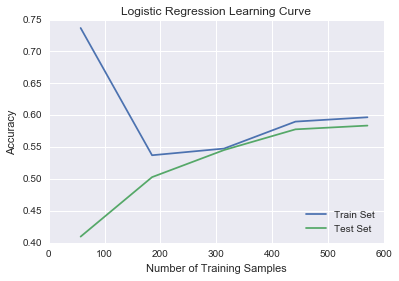

In [272]:
plt.plot(m, train_cv_acc)
plt.plot(m, test_cv_acc)
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(['Train Set', 'Test Set'], loc = 'lower right');